In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

In [5]:
opsdb = db.OpsimDatabase('fbs_1.4_db/baseline_v1.4_10yrs.db')

In [10]:
nside = 32
healslicer = slicers.HealpixSlicer(nside=nside)
subsetPlots = [plots.HealpixSkyMap(), plots.HealpixHistogram()]
standardStats = batches.standardSummary()

displayDict = {'group': 'Variables/Transients',
               'subgroup': 'Periodic Stars',
               'order': 0, 'caption': None}
bundleList = []
for period in [0.1, 0.5, 1, 2, 5, 10]:
    for magnitude in [21., 24.]:
        amplitudes = [0.05, 0.1, 1.0]
        periods = [period] * len(amplitudes)
        starMags = [magnitude] * len(amplitudes)

        plotDict = {'nTicks': 3, 'colorMin': 0, 'colorMax': 3, 'xMin': 0, 'xMax': 3}
        metadata = ''
        sql = None
        displayDict['caption'] = 'Measure if a periodic signal can be detected for an r=%i star '\
                                 'with period of %.1f and amplitudes of 0.05, 0.1 or 1 mag (corresponding to 3/2/1)'\
                                 % (max(starMags), max(amplitudes))

        summary = metrics.MeanMetric()
        metric = metrics.PeriodicDetectMetric(periods=periods, starMags=starMags,
                                              amplitudes=amplitudes,
                                              metricName='Periodic_period_%.1f_mag_%.0f'
                                                         % (period, magnitude))
        bundle = mb.MetricBundle(metric, healslicer, sql, metadata=metadata,
                                 displayDict=displayDict, plotDict=plotDict,
                                 plotFuncs=subsetPlots, summaryMetrics=standardStats)
        bundleList.append(bundle)
        displayDict['order'] += 1

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [12]:
g = mb.MetricBundleGroup(bundleList, opsdb, outDir ='temp')

In [13]:
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'filter', 'fieldRA', 'fieldDec', 'fiveSigmaDepth'].
Found 2180589 visits
Running:  ['opsim_Periodic_period_0_1_mag_21_HEAL', 'opsim_Periodic_period_0_5_mag_21_HEAL', 'opsim_Periodic_period_1_0_mag_21_HEAL', 'opsim_Periodic_period_2_0_mag_21_HEAL', 'opsim_Periodic_period_5_0_mag_21_HEAL', 'opsim_Periodic_period_10_0_mag_21_HEAL', 'opsim_Periodic_period_0_1_mag_24_HEAL', 'opsim_Periodic_period_0_5_mag_24_HEAL', 'opsim_Periodic_period_1_0_mag_24_HEAL', 'opsim_Periodic_period_2_0_mag_24_HEAL', 'opsim_Periodic_period_5_0_mag_24_HEAL', 'opsim_Periodic_period_10_0_mag_24_HEAL']


/Users/lynnej/lsstRepos/sims_utils/python/lsst/sims/utils/stellarMags.py:101: FutureWarning: fromrecords expected a list of tuples, may have received a list of lists instead. In the future that will raise an error
  dtype=list(zip(names, types)))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [35]:
for b in bundleList:
    b.setPlotDict({'nTicks': 3, 'colorMin': 0, 'colorMax': 3, 'xMin': 0, 'xMax': 3})

Plotting figures with "" constraint now.


/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
 

/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
 

/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:364: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning,

Plotting complete.


/Users/lynnej/lsst_stack/stack/miniconda3-4.7.12-984c9f7/DarwinX86/healpy/1.10.3.lsst2+5/lib/python/healpy-1.10.3-py3.7-macosx-10.9-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


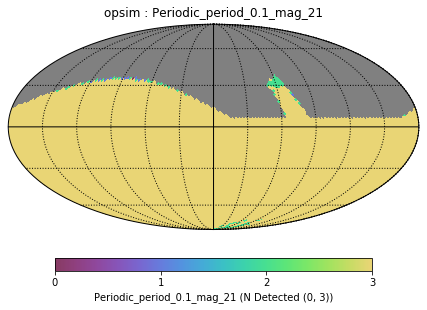

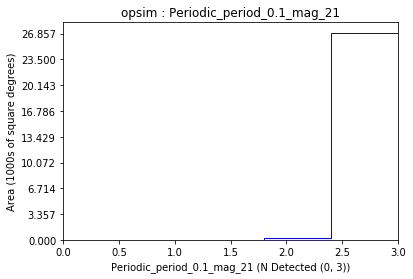

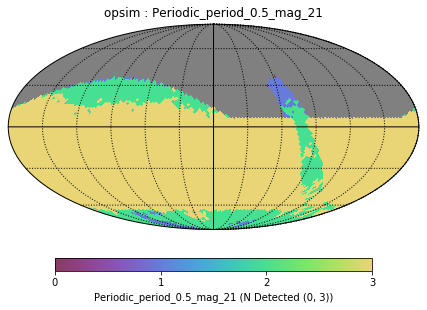

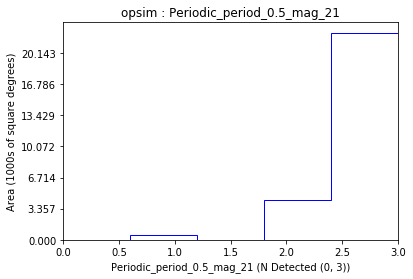

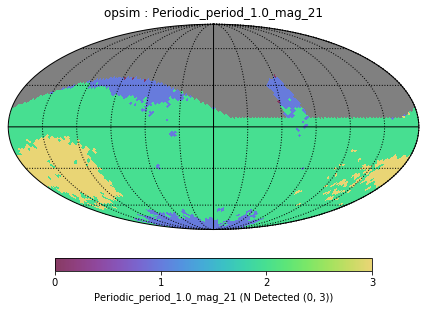

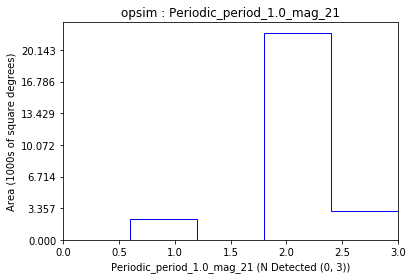

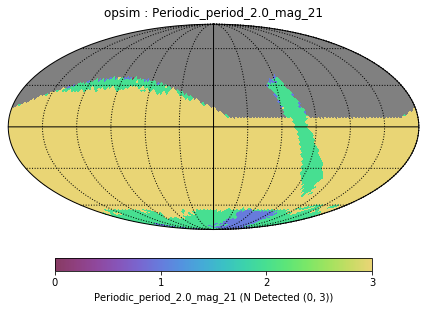

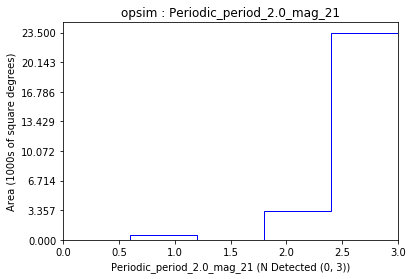

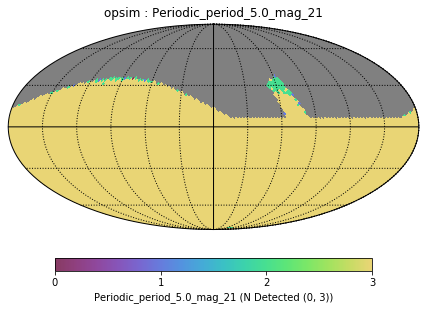

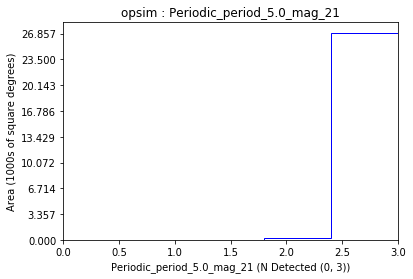

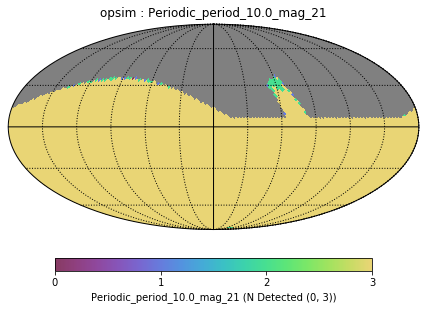

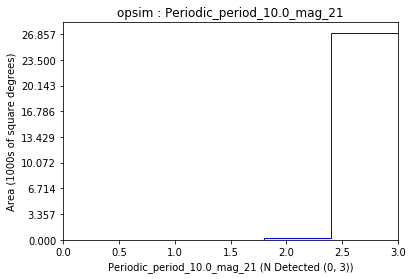

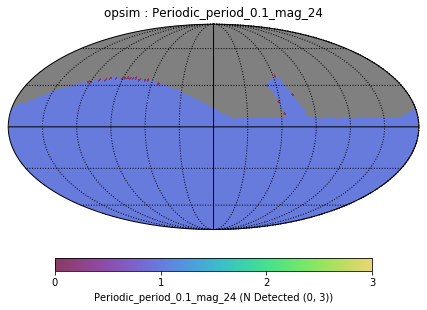

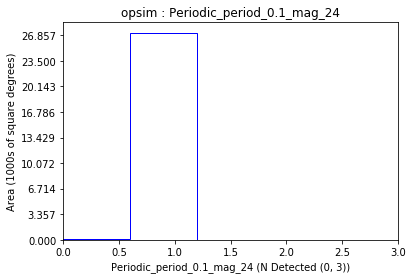

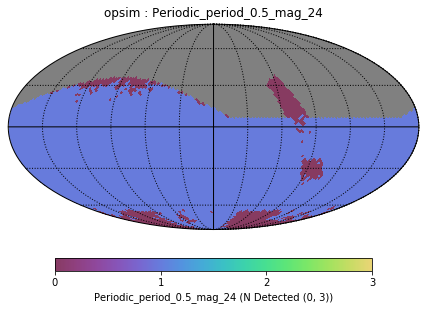

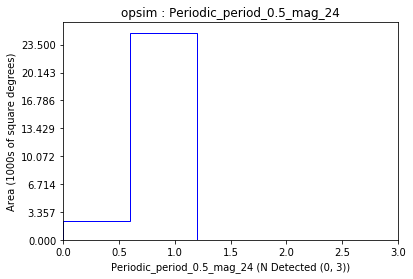

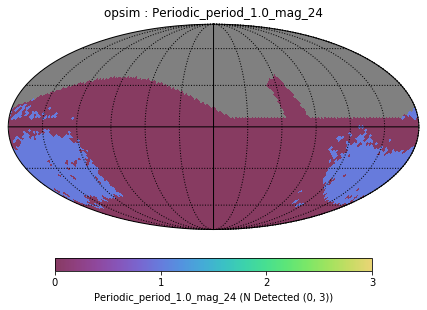

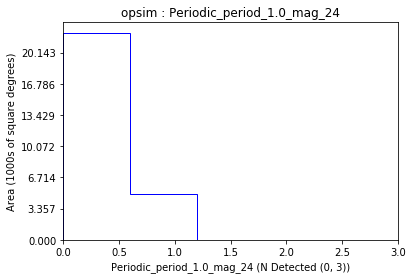

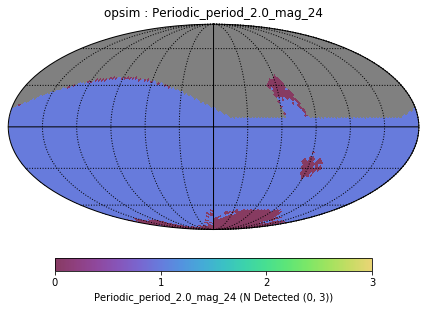

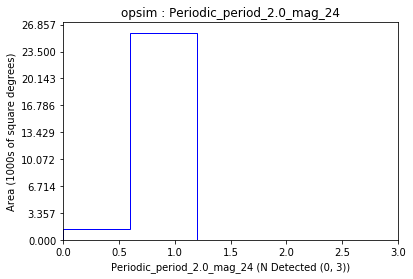

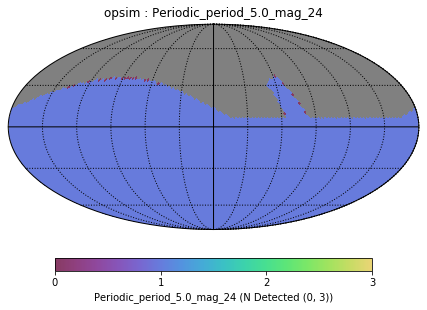

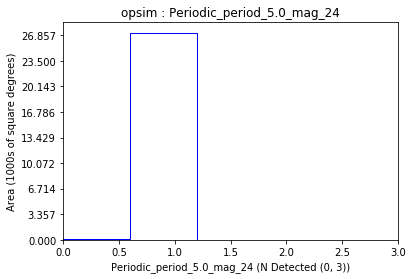

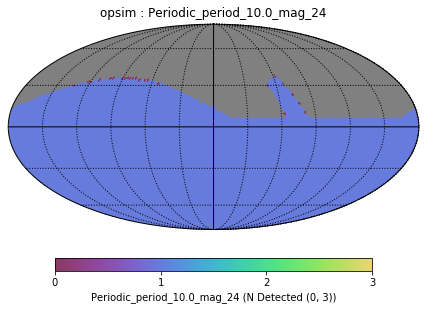

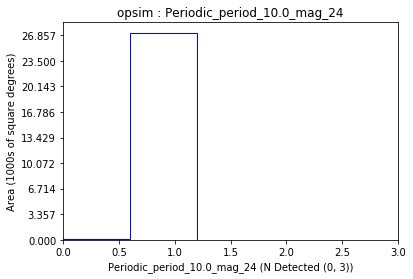

In [36]:
g.plotAll(closefigs=False)